<a href="https://colab.research.google.com/github/Brauliovh3/web/blob/main/Red_Neuronal_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# RED NEURONAL SIMPLE CON TENSORFLOW Y KERAS

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


print("=" * 33)
print("CREANDO RED NEURONAL ARTIFICIAL")
print("=" * 33)

CREANDO RED NEURONAL ARTIFICIAL


In [28]:
print("📊 PASO 1 Cargar datos reales de IRIS\n")

# Cargar dataset Iris flores
iris = load_iris()
X = iris.data          # 150 flores, 4 características
y = iris.target        # 3 tipos de flores (0, 1, 2)

print(f"  Dataset cargado desde sklearn")
print(f"  Total de flores: {len(X)}")
print(f"  Características: {X.shape[1]} (largo/ancho de pétalos y sépalos)")
print(f"  Clases: {len(np.unique(y))} tipos de flores")
print(f"    - Clase 0: Setosa")
print(f"    - Clase 1: Versicolor")
print(f"    - Clase 2: Virginica")

# Mostrar ejemplo de datos
print(f"\n📋 Ejemplo de datos:")
print(f"  Primera flor: {X[0]} → Tipo: {y[0]}")
print(f"  [Largo sépalo, Ancho sépalo, Largo pétalo, Ancho pétalo]")

# Dividir datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar datos (escalar entre 0 y 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"\n✓ Datos divididos:")
print(f"  Entrenamiento: {len(X_train)} flores")
print(f"  Prueba: {len(X_test)} flores\n")


📊 PASO 1 Cargar datos reales de IRIS

  Dataset cargado desde sklearn
  Total de flores: 150
  Características: 4 (largo/ancho de pétalos y sépalos)
  Clases: 3 tipos de flores
    - Clase 0: Setosa
    - Clase 1: Versicolor
    - Clase 2: Virginica

📋 Ejemplo de datos:
  Primera flor: [5.1 3.5 1.4 0.2] → Tipo: 0
  [Largo sépalo, Ancho sépalo, Largo pétalo, Ancho pétalo]

✓ Datos divididos:
  Entrenamiento: 120 flores
  Prueba: 30 flores



In [29]:
print("🧠 PASO 2 Crear red neuronal\n")

modelo = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(4,)),  # Capa oculta 1
    keras.layers.Dense(8, activation='relu'),                      # Capa oculta 2
    keras.layers.Dense(3, activation='softmax')                    # 3 salidas (3 tipos)
])

modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Para clasificación múltiple
    metrics=['accuracy']
)

print("✓ Red creada: Entrada(4) → Oculta(16) → Oculta(8) → Salida(3)")
print(f"  Total parámetros: {modelo.count_params()}\n")

🧠 PASO 2 Crear red neuronal

✓ Red creada: Entrada(4) → Oculta(16) → Oculta(8) → Salida(3)
  Total parámetros: 243



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
print("🚀 PASO 3 Entrenar 4 modelos con diferentes épocas\n")

epocas_lista = [10, 50, 100, 200]
modelos = []

for epocas in epocas_lista:
    # Crear modelo nuevo
    m = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(4,)),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
    ])
    m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entrenar
    hist = m.fit(X_train, y_train, epochs=epocas, verbose=0, validation_split=0.2)

    # Evaluar en datos de prueba
    loss, accuracy = m.evaluate(X_test, y_test, verbose=0)

    modelos.append({
        'epocas': epocas,
        'modelo': m,
        'history': hist.history,
        'test_accuracy': accuracy
    })

    print(f"Modelo {epocas:3d} épocas: Precisión entrenamiento {hist.history['accuracy'][-1]*100:.1f}% | Precisión prueba {accuracy*100:.1f}%")

print("\n✓ 4 modelos entrenados\n")

🚀 PASO 3 Entrenar 4 modelos con diferentes épocas

Modelo  10 épocas: Precisión entrenamiento 70.8% | Precisión prueba 80.0%
Modelo  50 épocas: Precisión entrenamiento 81.2% | Precisión prueba 90.0%
Modelo 100 épocas: Precisión entrenamiento 85.4% | Precisión prueba 90.0%
Modelo 200 épocas: Precisión entrenamiento 95.8% | Precisión prueba 100.0%

✓ 4 modelos entrenados



📈 PASO 4: Visualizar resultados



/tmp/ipython-input-1751006350.py:67: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1751006350.py:67: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


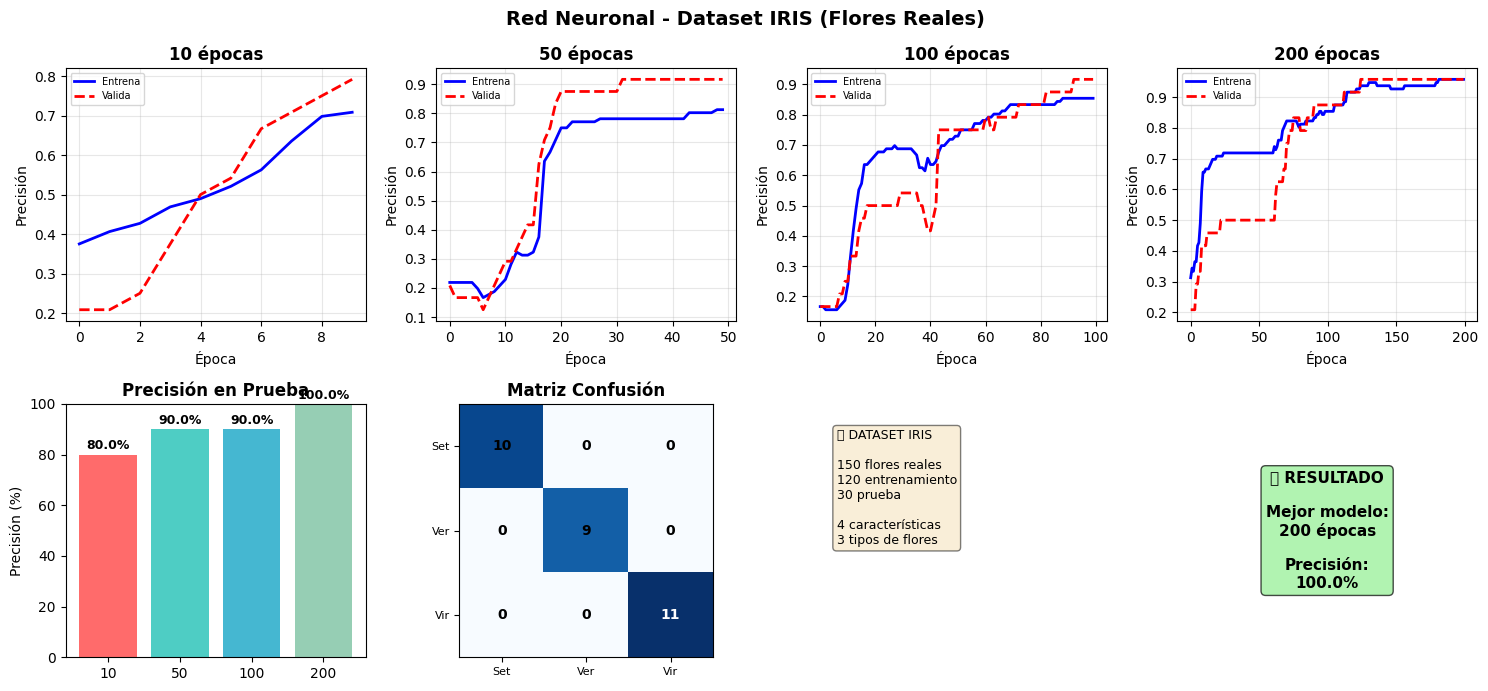

✅ COMPLETADO
Mejor: 200 épocas → 100.0% precisión


In [33]:
print("📈 PASO 4 Visualizar resultados\n")

fig, axes = plt.subplots(2, 4, figsize=(15, 7))

# FILA 1: Precisión de cada modelo
for i, m_data in enumerate(modelos):
    ax = axes[0, i]
    ax.plot(m_data['history']['accuracy'], 'b-', linewidth=2, label='Entrena')
    ax.plot(m_data['history']['val_accuracy'], 'r--', linewidth=2, label='Valida')
    ax.set_title(f"{m_data['epocas']} épocas", fontweight='bold')
    ax.set_ylabel('Precisión')
    ax.set_xlabel('Época')
    ax.legend(fontsize=7)
    ax.grid(True, alpha=0.3)

# FILA 2: Comparación final
# Gráfica de barras
ax = axes[1, 0]
epocas_vals = [m['epocas'] for m in modelos]
test_accs = [m['test_accuracy']*100 for m in modelos]
bars = ax.bar(range(4), test_accs, color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4'])
ax.set_xticks(range(4))
ax.set_xticklabels(epocas_vals)
ax.set_ylabel('Precisión (%)')
ax.set_title('Precisión en Prueba', fontweight='bold')
ax.set_ylim([0, 100])
for bar, val in zip(bars, test_accs):
    ax.text(bar.get_x() + bar.get_width()/2, val + 2, f'{val:.1f}%',
            ha='center', fontweight='bold', fontsize=9)

# Matriz de confusión
ax = axes[1, 1]
mejor_modelo = modelos[-1]['modelo']
y_pred = np.argmax(mejor_modelo.predict(X_test, verbose=0), axis=1)
confusion = np.zeros((3, 3))
for true, pred in zip(y_test, y_pred):
    confusion[true][pred] += 1

im = ax.imshow(confusion, cmap='Blues')
ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticklabels(['Set', 'Ver', 'Vir'], fontsize=8)
ax.set_yticklabels(['Set', 'Ver', 'Vir'], fontsize=8)
ax.set_title('Matriz Confusión', fontweight='bold')
for i in range(3):
    for j in range(3):
        ax.text(j, i, int(confusion[i, j]), ha='center', va='center',
                color='white' if confusion[i, j] > 10 else 'black', fontweight='bold')

# Info del dataset
ax = axes[1, 2]
ax.axis('off')
info = f"📊 DATASET IRIS\n\n150 flores reales\n{len(X_train)} entrenamiento\n{len(X_test)} prueba\n\n4 características\n3 tipos de flores"
ax.text(0.1, 0.9, info, transform=ax.transAxes, fontsize=9, va='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Resultado final
ax = axes[1, 3]
ax.axis('off')
mejor_acc = modelos[-1]['test_accuracy']*100
resultado = f"✅ RESULTADO\n\nMejor modelo:\n{modelos[-1]['epocas']} épocas\n\nPrecisión:\n{mejor_acc:.1f}%"
ax.text(0.5, 0.5, resultado, transform=ax.transAxes, fontsize=11,
        ha='center', va='center', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.suptitle('Red Neuronal - Dataset IRIS Flores Reales', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ COMPLETADO")
print(f"Mejor: {modelos[-1]['epocas']} épocas → {modelos[-1]['test_accuracy']*100:.1f}% precisión")